In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Read data file
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Platinum_Data.csv', index_col='Date')

# PREPROCESSING DATA

In [3]:
# Flip the dataset
df = df.iloc[::-1]

# Reset the index
df = df.reset_index(drop=True)

# Drop unused columns
df.drop(['Vol.', 'Change %'], axis=1, inplace = True)

# Drop missing values
df = df.dropna()

In [4]:
df

,Price,Open,High,Low
0,941.20,943.85,946.20,933.40
1,937.85,938.35,939.05,935.90
2,930.85,937.70,938.50,924.45
3,917.25,930.75,931.20,914.85
4,903.55,917.15,917.90,900.10
...,...,...,...,...
1713,"1,036.40","1,007.70","1,043.00","1,006.70"
1714,"1,038.70","1,035.50","1,044.30","1,026.60"
1715,"1,024.60","1,039.40","1,051.80","1,022.30"
1716,"1,013.90","1,025.00","1,033.00","1,010.90"


In [5]:
# Format column Price to float
# List of column names to convert
columns = ['Price', 'Open', 'High', 'Low']

# Iterate over the columns and convert them to float
for column in columns:
    df[column] = df[column].str.replace(',', '').astype(float)
df

,Price,Open,High,Low
0,941.20,943.85,946.20,933.40
1,937.85,938.35,939.05,935.90
2,930.85,937.70,938.50,924.45
3,917.25,930.75,931.20,914.85
4,903.55,917.15,917.90,900.10
...,...,...,...,...
1713,1036.40,1007.70,1043.00,1006.70
1714,1038.70,1035.50,1044.30,1026.60
1715,1024.60,1039.40,1051.80,1022.30
1716,1013.90,1025.00,1033.00,1010.90


# SPLITTING DATA(7-2-1)

In [6]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

# FIND BEST VALUE FOR K

In [7]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 9.014993584548252
RMSE value for k=  2 is: 8.158181404811945
RMSE value for k=  3 is: 7.881665093037635
RMSE value for k=  4 is: 7.763789516746955
RMSE value for k=  5 is: 7.6505339473333756
RMSE value for k=  6 is: 7.639214355348225
RMSE value for k=  7 is: 7.625618289217894
RMSE value for k=  8 is: 7.731302764314131
RMSE value for k=  9 is: 7.767466376214689
RMSE value for k=  10 is: 8.02529292491011
RMSE value for k=  11 is: 8.11826463567736
RMSE value for k=  12 is: 8.264264379197215
RMSE value for k=  13 is: 8.424081593217462
RMSE value for k=  14 is: 8.590382952063585
RMSE value for k=  15 is: 8.671165693266264
RMSE value for k=  16 is: 8.725238378271003
RMSE value for k=  17 is: 8.820074114797416
RMSE value for k=  18 is: 8.916436566021513
RMSE value for k=  19 is: 8.946476753807692
RMSE value for k=  20 is: 9.014565236699198


<Axes: >

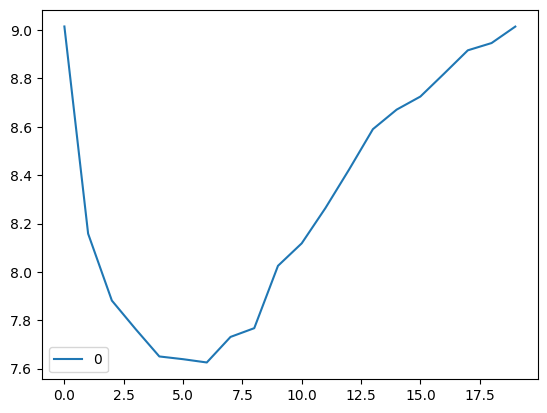

In [9]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [10]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [11]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [12]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[646.20714286 646.20714286 646.20714286 646.20714286 646.20714286
 646.20714286 646.20714286 646.20714286 646.20714286 646.20714286
 646.20714286 646.20714286 646.20714286 646.20714286 646.20714286
 646.20714286 646.20714286 646.20714286 646.20714286 646.20714286
 646.20714286 646.20714286 646.20714286 646.20714286 646.20714286
 646.20714286 646.20714286 646.20714286 646.20714286 646.20714286]


In [13]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  7.625618289217894
Testing MAE:  5.844793835901721
Testing MAPE:  0.604308009045852
Validation RMSE:  8.49892305593892
Validation MAE:  6.909042113955401
Validation MAPE:  0.6727265931103772


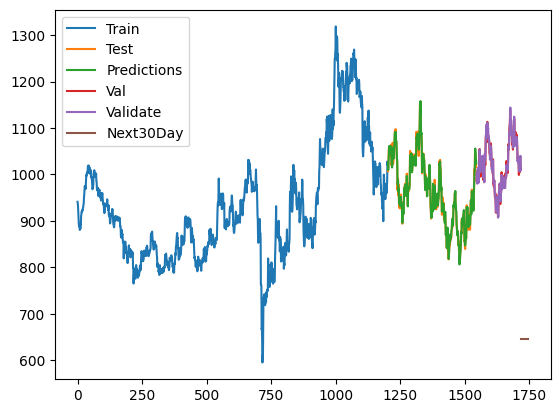

In [14]:
# Plot the model
plt.plot(train_data.index,train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [15]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


# SPLITTING DATA(6-3-1)

In [16]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [17]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [18]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.527950316375815
RMSE value for k=  2 is: 9.221505902861251
RMSE value for k=  3 is: 8.795967682122344
RMSE value for k=  4 is: 9.045693807348927
RMSE value for k=  5 is: 8.998056575501309
RMSE value for k=  6 is: 8.99979358207492
RMSE value for k=  7 is: 9.10220881816752
RMSE value for k=  8 is: 9.313249098365404
RMSE value for k=  9 is: 9.441469707292871
RMSE value for k=  10 is: 9.390999424671197
RMSE value for k=  11 is: 9.479300717912581
RMSE value for k=  12 is: 9.595806171944918
RMSE value for k=  13 is: 9.609581116420596
RMSE value for k=  14 is: 9.813657619198443
RMSE value for k=  15 is: 9.78587074045369
RMSE value for k=  16 is: 9.920882997385645
RMSE value for k=  17 is: 9.934359577665926
RMSE value for k=  18 is: 10.093633656129715
RMSE value for k=  19 is: 10.166942895119048
RMSE value for k=  20 is: 10.20350139372498


<Axes: >

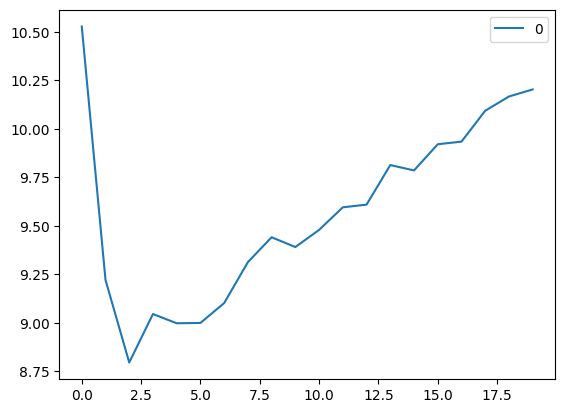

In [19]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [20]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [22]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2
 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2 604.2
 604.2 604.2 604.2 604.2 604.2 604.2]


In [23]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  8.795967682122344
Testing MAE:  6.6395469255663455
Testing MAPE:  0.6525156309736513
Validation RMSE:  9.29179581634324
Validation MAE:  7.248940269749516
Validation MAPE:  0.7053635279273779


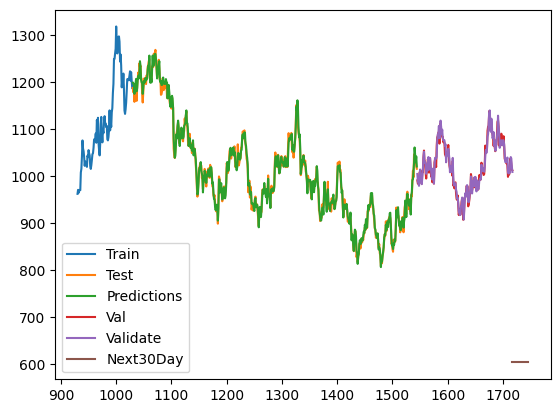

In [24]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [25]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


# SPLITTING DATA(5-3-2)

In [26]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [27]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [28]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 89.40994221556286
RMSE value for k=  2 is: 90.55032754198714
RMSE value for k=  3 is: 92.63914662018225
RMSE value for k=  4 is: 93.74142472593452
RMSE value for k=  5 is: 93.21419843720838
RMSE value for k=  6 is: 94.1650321234545
RMSE value for k=  7 is: 94.45699730357562
RMSE value for k=  8 is: 95.81489546654299
RMSE value for k=  9 is: 96.45665921653953
RMSE value for k=  10 is: 96.44889154441144
RMSE value for k=  11 is: 96.67765783713236
RMSE value for k=  12 is: 97.85864294113607
RMSE value for k=  13 is: 98.45134365615664
RMSE value for k=  14 is: 98.86011061569828
RMSE value for k=  15 is: 99.06775957661338
RMSE value for k=  16 is: 98.91690491687248
RMSE value for k=  17 is: 98.87493797941269
RMSE value for k=  18 is: 99.0410342391362
RMSE value for k=  19 is: 99.35283844524486
RMSE value for k=  20 is: 99.52629045043955


<Axes: >

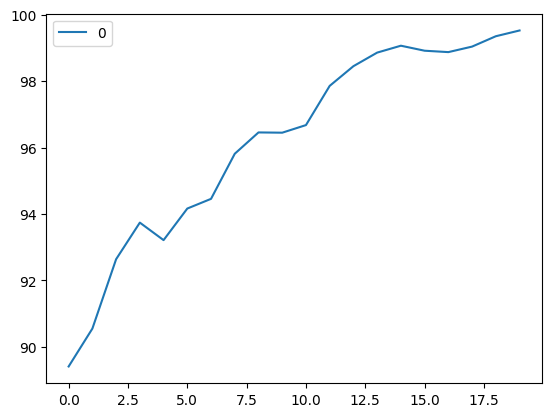

In [29]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [30]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y_train)

KNeighborsRegressor()

In [31]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [32]:
# Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97
 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97
 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97 623.97]


In [33]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  93.21419843720838
Testing MAE:  57.65984466019417
Testing MAPE:  4.953020453414264
Validation RMSE:  26.362895117067243
Validation MAE:  15.180639534883714
Validation MAPE:  1.46422293563668


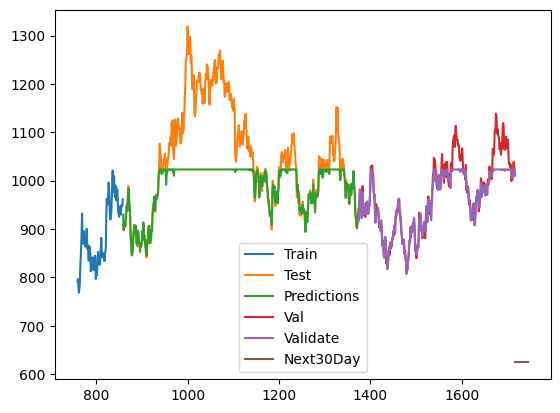

In [34]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [35]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.24


# Evaluating model

---

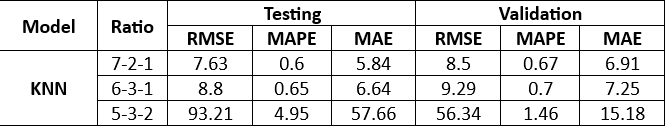